In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls '/content/drive/MyDrive/Stock'

'Day Trade.txt'  'What is KDJ.txt'  'What Is MACD.txt'


In [3]:
import nltk
nltk.download("popular")
nltk.download('all-corpora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [4]:
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/MyDrive/Stock' # 請改成自己的路徑
wordlists = PlaintextCorpusReader(corpus_root, '.*') # *: all .txt

books = wordlists.fileids()
print(books)

['Day Trade.txt', 'What Is MACD.txt', 'What is KDJ.txt']


In [5]:
from nltk.corpus import brown
# 使用 ConditionalFreqDist() 在多個文本中計算特定字詞個數


cfd = nltk.ConditionalFreqDist((fileid, word)
    for fileid in books
    for word in wordlists.words(fileid)
    )

findList = ['buy', 'sell', 'high']
cfd.tabulate(conditions=books, samples=findList)

                  buy sell high 
   Day Trade.txt    5    8    3 
What Is MACD.txt    4    3    1 
 What is KDJ.txt    2    1    1 


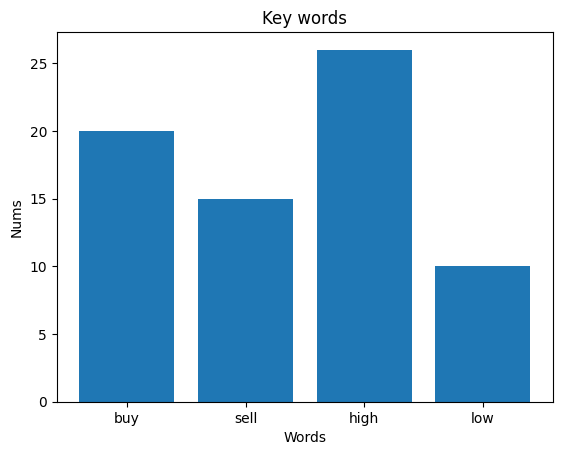

<Figure size 500x400 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

x = ['buy', 'sell', 'high', 'low']
y = [20, 15, 26, 10]


plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.figure(figsize=(5,4))
plt.show()

<Axes: xlabel='Samples', ylabel='Counts'>

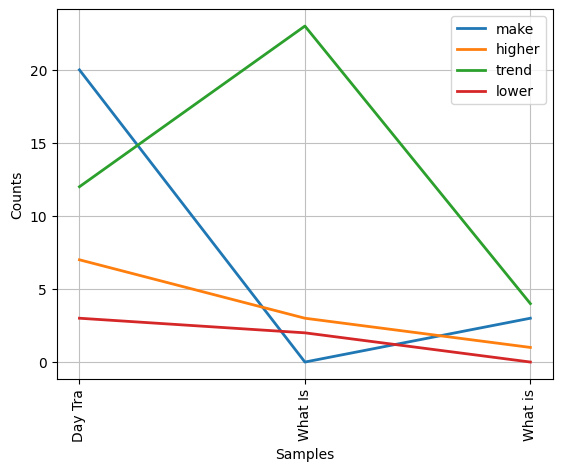

In [12]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:7]) # 表格下方顯示txt檔名前七個字
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)
           #List裡面請改成你要搜尋的字詞
           for target in ['lower', 'higher', 'trend', 'make']
           if w.lower().startswith(target))
cfd.plot()

<Axes: xlabel='Samples', ylabel='Counts'>

) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


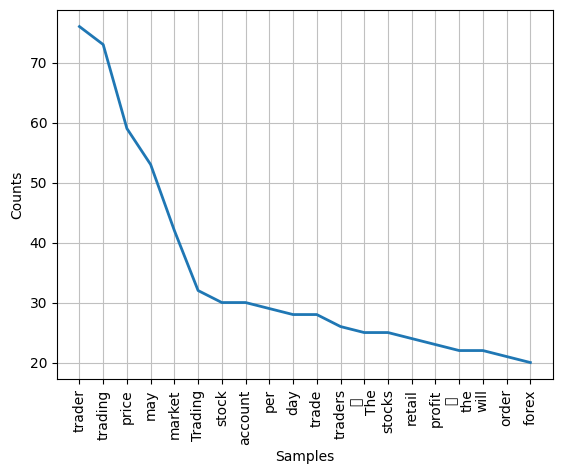

In [14]:
#分析高頻率單字

import nltk
from wordcloud import STOPWORDS

dataset = wordlists.raw('Day Trade.txt')

tokens = dataset.split(' ') #以空格斷詞
clean_tokens = tokens[:]

for token in tokens:
  if token.lower() in STOPWORDS:
    clean_tokens.remove(token)  #若有STOPWORDS,remove掉

freq = nltk.FreqDist(clean_tokens)

# for key,val in freq.items():
#  print (str(key) + ':' + str(val))
freq.plot(20,cumulative=False)